In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['font.size']=18
plt.rcParams['axes.linewidth']=2.5
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'
plt.rcParams['lines.linewidth'] = 2.5
from matplotlib.ticker import MultipleLocator

In [12]:
# base    = "/home/aditiv/CGM/Pyxsim/Spectra/"
base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Spectra/"


ld_lsfr = "HR_0821_1e-6_SFR3/DD0300/"
hd_hsfr = "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/DD0130/"
folder  =[ld_lsfr, hd_hsfr]
label   = ['n1e-6$\Sigma$3M$_{\odot}$', 'n6e-5$\Sigma$10M$_{\odot}$']

color   = ['forestgreen', 'navy']

ls      = [':', '-', '-.']

In [19]:
sim_HR  = "sim_spec_HR.txt"
sim_LR  = "sim_spec_LR.txt"
ub_HR   = "lowub_spec_HR.txt"
ub_LR   = "lowub_spec_LR.txt"
i       = 0

dum     = np.loadtxt(base + folder[0] + sim_HR,usecols=0)
eHR     = np.zeros((1,dum.shape[0]))
simHR   = np.zeros((len(folder),dum.shape[0]))
ubHR1   = np.zeros((len(folder),dum.shape[0]))
ubHR2   = np.zeros((len(folder),dum.shape[0]))


dum     = np.loadtxt(base + folder[0] + sim_LR,usecols=0)
eLR     = np.zeros((1,dum.shape[0]))
simLR   = np.zeros((len(folder),dum.shape[0]))
ubLR1   = np.zeros((len(folder),dum.shape[0]))
ubLR2   = np.zeros((len(folder),dum.shape[0]))



for f in folder:
    eHR         = np.loadtxt(base + f + sim_HR,usecols=0)
    simHR[i]    = np.loadtxt(base + f + sim_HR,usecols=1)
    ubHR1[i]    = np.loadtxt(base + f + ub_HR, usecols=1)
#     ubHR2[i]    = np.loadtxt(base + f + ub_HR, usecols=2)
    
    eLR         = np.loadtxt(base + f + sim_LR,usecols=0)
    simLR[i]    = np.loadtxt(base + f + sim_LR,usecols=1)
    ubLR1[i]    = np.loadtxt(base + f + ub_LR, usecols=1)
#     ubLR2[i]    = np.loadtxt(base + f + ub_LR, usecols=2)
    
    i = i + 1
    

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure includ

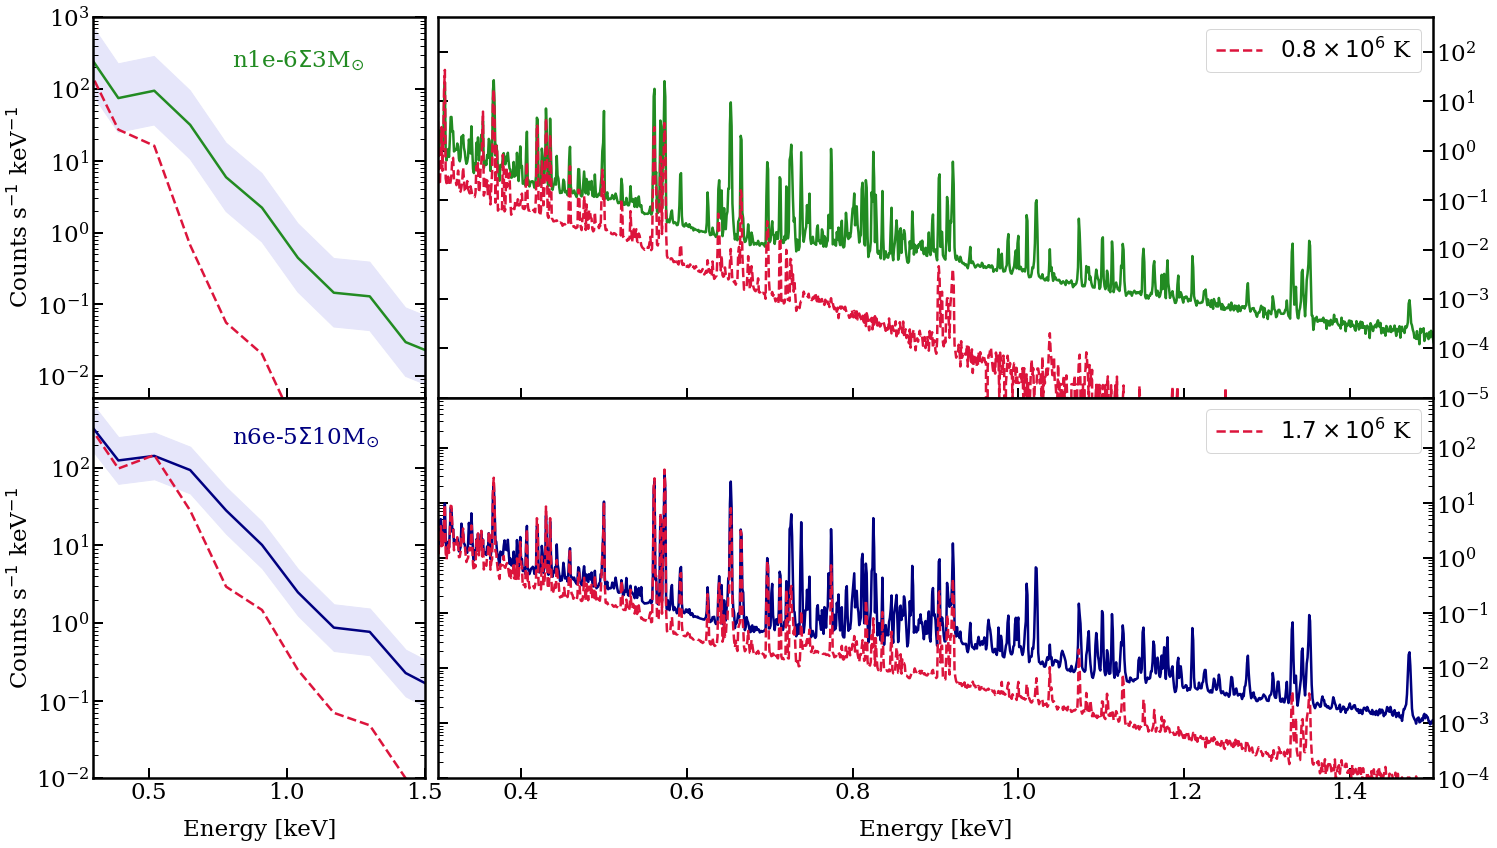

In [18]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

plt.rcParams['axes.linewidth']=2.5
matplotlib.rc("font", size=18, family="serif")
plt.rcParams['font.size']=23
f, ax = plt.subplots(2, 2, figsize=(24,14), \
                     gridspec_kw = {'wspace':0.02, 'hspace':0, 'width_ratios':[1, 3]})

factor = [3.,2. ]
temp = [r'$0.8\times 10^6$ K', r'$1.7\times 10^6$ K']

for i in range(2):
    
    plt.setp(ax,'xlim',(0.3,1.5))
    plt.setp(ax,'yscale', 'log')
    ax[i,0].plot(eLR,simLR[i,:]/eLR,'-', color = color[i], label = label[i])
    ax[i,0].plot(eLR,ubLR1[i,:]/eLR,'--', color = 'crimson', label = label[i])
    
    
    ymin = simLR[i,:]/eLR/factor[i]
    ymax = simLR[i,:]*factor[i]/eLR 
    ax[i,0].fill_between(eLR, ymin, ymax, color = 'lavender')
    
#     plt.setp(ax[i,1],'xlim',(0.1,2.0))
    ax[i,1].plot(eHR,simHR[i,:]/eHR,'-', lw=2.5, color = color[i])
    ax[i,1].plot(eHR,(ubHR1[i,:]+ubHR2[i])/eHR,'--', color = 'crimson', label = temp[i])
    ax[i,1].legend(loc='upper right')
    
    subset = (eHR>=0.6) & (eHR<=0.7)
#     ax2  = inset_axes(ax[i,1], width="30%", height="40%", loc=1)
#     ax2.spines['right'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
    
#     mark_inset(ax[i,1], ax2, loc1=3, loc2=4, fc="none", ec='0.5')
#     ax2.plot(eHR[subset],simHR[i,subset]/eHR[subset],'-', lw=2.5, color = color[i])
#     ax2.plot(eHR[subset],(ubHR1[i,subset]+ubHR2[i,subset])/eHR[subset],'--', color = 'crimson')
#     ax2.set_yscale('log')
#     if(i==0):
#         ax2.set_ylim(1.e-3,1.)
#     else:
#         ax2.set_ylim(1.e-2,1.)
#     ax2.set_xticks((0.6, 0.65, 0.7))
#     ax2.tick_params('y', which='both', labelleft=True)
    
    ax[i,0].text(0.8, 200.,label[i], color=color[i])
    
    
    ax[i, 1].tick_params('y', which='both', right=True)
    ax[i, 0].tick_params('y', which='both', right=True)
    ax[i, 1].tick_params('y', which='both', labelright=True, labelleft=False)
    ax[0, i].tick_params('x', which='both', labelbottom=False)
#     ax[i, 1].tick_params('x', which='both', labelbottom=False)
    
    
ax[1,0].set_xlabel('x', labelpad=15)
ax[1,1].set_xlabel('x', labelpad=15)

# ax[0,0].text(0.15, 2.e2,'(a)')
# ax[0,1].text(0.15, 2.e2,'(b)')

plt.setp(ax[0,0],'ylim',(5.e-3,1.e3))
plt.setp(ax[0,0],'yticks',(1.e-2, 1.e-1,1., 10., 1.e2, 1.e3))

plt.setp(ax[0,1],'ylim',(1.e-5,500.)) 
plt.setp(ax[0,1],'yticks',(1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1,1., 10., 1.e2))

plt.setp(ax[1,0],'ylim',(1.e-2,8.e2))
plt.setp(ax[1,0],'yticks',(1.e-2, 1.e-1,1., 10., 1.e2))

plt.setp(ax[1,1],'ylim',(1.e-4,8.e2)) 
plt.setp(ax[1,1],'yticks',(1.e-4, 1.e-3, 1.e-2, 1.e-1,1., 10., 1.e2))

# ax[0,1].legend(loc='upper right')

plt.setp(ax[1,0],'xticks',(0.5,1.0,1.5))
plt.setp(ax[1,1],'xticks',np.arange(0.4,1.5,0.2))

plt.setp(ax[1,:],'xlabel','Energy [keV]')
plt.setp(ax[:,0],'ylabel',r'Counts s$^{-1}$ keV$^{-1}$')
plt.setp(ax[0,:],'xticklabels', '')
# plt.setp(ax[:,1],'yticklabels', '') 

plt.tight_layout()    


# plt.savefig(base  + 'spectrum_LRHR_v2.pdf', bbox_inches='tight',dpi=160)    